# Q4

import the libraries

In [34]:
import cv2
import numpy as np

read both images and plot them

In [35]:
from matplotlib import pyplot as plt

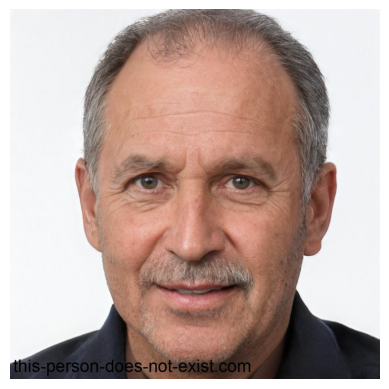

In [36]:
# Read the image
grandpa = cv2.imread("/content/q4_grandpa.jpeg")

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
grandpa_rgb = cv2.cvtColor(grandpa, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(grandpa_rgb)
plt.axis('off')  # Turn off axis
plt.show()

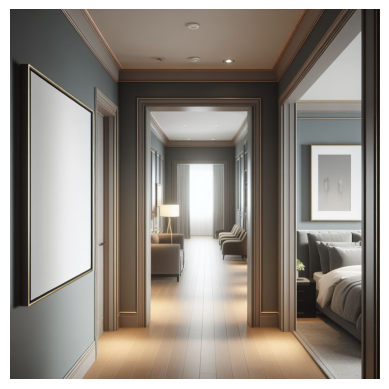

In [37]:
# Read the image
room = cv2.imread("/content/q4_room.jpeg")

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
room_rgb = cv2.cvtColor(room, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(room_rgb)
plt.axis('off')  # Turn off axis
plt.show()

add black ribbon to grandpa image

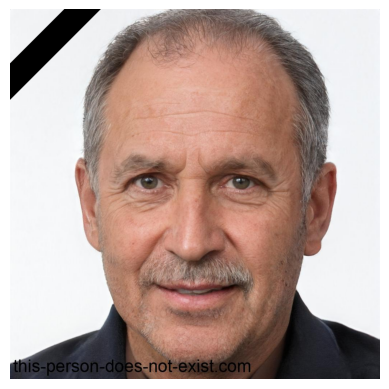

In [38]:
# Create a black ribbon mask
ribbon_mask = np.zeros_like(grandpa[:, :, 0], dtype=np.uint8)

# Define the vertices of the ribbon
ribbon_vertices = np.array([[250, 0], [150, 0], [0, 150], [0, 250]], np.int32)

# Fill the ribbon area in the mask with white color (255)
cv2.fillPoly(ribbon_mask, [ribbon_vertices], 255)

# Make a copy of the original image to work with
grandpa_with_ribbon = np.copy(grandpa)

# Make the ribbon area black in the copy
grandpa_with_ribbon[np.where(ribbon_mask == 255)] = [0, 0, 0]

# Plot the modified image
plt.imshow(cv2.cvtColor(grandpa_with_ribbon, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

define the coordinates of destination image

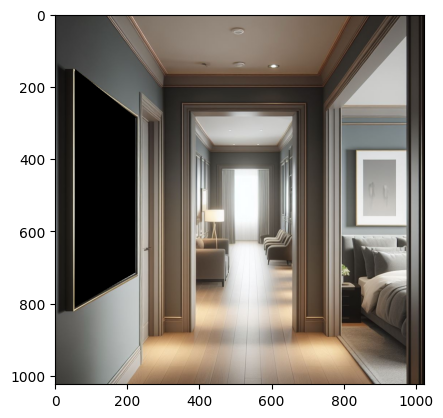

In [40]:
from google.colab.patches import cv2_imshow

def add_black_box(room_image, box_vertices):
    try:
        # Create a black mask
        black_mask = np.zeros_like(room_image[:, :, 0], dtype=np.uint8)

        # Fill the box area in the mask with white color (255)
        cv2.fillPoly(black_mask, [box_vertices], 255)

        # Make the box area black
        room_image[np.where(black_mask == 255)] = [0, 0, 0]

        return room_image

    except Exception as e:
        print("An error occurred:", e)
        return None


# Define the vertices of the box
box_vertices = np.array([[222, 715], [222, 285], [55, 152], [55, 810]], np.int32)

# Add black box to the room image
room_image_with_box = add_black_box(room, box_vertices)

# Display the modified image
plt.imshow(cv2.cvtColor(room_image_with_box, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()


get the transform matrix

In [41]:
def project_image(grandpa_image, room_image, wall_points):
    try:
        # Get image dimensions
        grandpa_height, grandpa_width, _ = grandpa_image.shape
        room_height, room_width, _ = room_image.shape

        # Define source points as the corners of the grandpa image
        source_points = np.float32([[0, 0], [grandpa_width, 0], [grandpa_width, grandpa_height], [0, grandpa_height]])

        # Define destination points as the points on the wall in the room image
        destination_points = np.float32(wall_points)

        # Calculate homography matrix
        homography_matrix, _ = cv2.findHomography(source_points, destination_points)

        # Perform perspective transform
        warped_grandpa_image = cv2.warpPerspective(grandpa_image, homography_matrix, (room_width, room_height))

        # Add warped grandpa image to room image
        room_with_grandpa = cv2.addWeighted(room_image, 1, warped_grandpa_image, 1, 0)

        return room_with_grandpa

    except Exception as e:
        print("An error occurred:", e)
        return None


apply the transform and plot the result

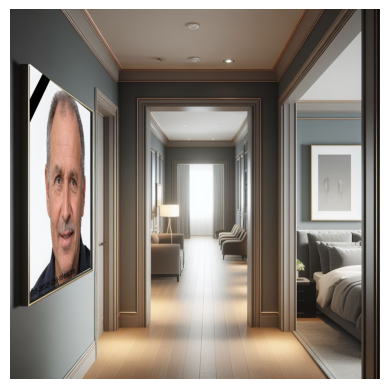

In [42]:
box_vertices = [(55, 152), (222, 285), (222, 715), (55, 810)]

# Project grandpa's image onto the wall in room image
projected_image = project_image(grandpa_with_ribbon, room, box_vertices)

# Display the projected image
plt.imshow(cv2.cvtColor(projected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()